In [69]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [70]:
"""import zipfile
with zipfile.ZipFile("fashionmnist.zip", 'r') as zip_ref:
    zip_ref.extractall("")"""

'import zipfile\nwith zipfile.ZipFile("fashionmnist.zip", \'r\') as zip_ref:\n    zip_ref.extractall("")'

In [71]:

data_train = pd.read_csv('fashion-mnist_train.csv')
data_test = pd.read_csv('fashion-mnist_test.csv')

In [72]:
data_train.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

In [73]:
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

In [74]:
x_train = np.array(data_train.drop(["label"],axis=1))
y_train = np.array(data_train["label"])

In [75]:
x_test = np.array(data_test.drop(["label"],axis=1))
y_test = np.array(data_test["label"])

In [76]:
x_train.shape


(60000, 784)

In [77]:
x_test.shape

(10000, 784)

In [78]:
data_train["label"].value_counts()

9    6000
8    6000
7    6000
6    6000
5    6000
4    6000
3    6000
2    6000
1    6000
0    6000
Name: label, dtype: int64

In [79]:
x_train = x_train.reshape(60000, 28, 28, 1)
x_train = x_train / 255.0
x_test = x_test.reshape(10000, 28, 28, 1)
x_test = x_test/255.0

In [80]:

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])



In [81]:
model.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [82]:

history = model.fit(x_train, 
                    y_train,
                   epochs = 50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 110us/sample - loss: 0.4703 - accuracy: 0.8301
Epoch 2/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.3193 - accuracy: 0.8839
Epoch 3/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2727 - accuracy: 0.9008
Epoch 4/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2401 - accuracy: 0.9113
Epoch 5/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.2178 - accuracy: 0.9197
Epoch 6/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1965 - accuracy: 0.9269
Epoch 7/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1785 - accuracy: 0.9334
Epoch 8/50
60000/60000 [==============================] - 6s 106us/sample - loss: 0.1652 - accuracy: 0.9388
Epoch 9/50
60000/60000 [==============================] - 6s 105us/sample - loss: 0.1492 - accuracy: 0.9438
Epoch

In [83]:
model.evaluate(x_test, y_test, verbose=0)

[0.7889364155704738, 0.9124]

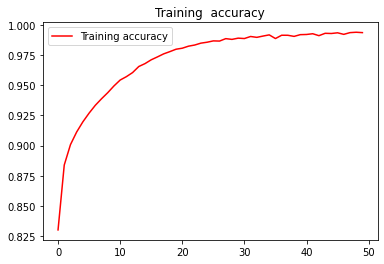

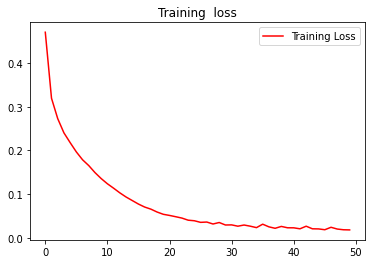

In [85]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
loss =  history.history['loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training  loss')
plt.legend()

plt.show()

In [86]:

model1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

model1.compile(optimizer = 'rmsprop', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model1.fit(x_train, 
                    y_train,
                   epochs = 50)

Train on 60000 samples
Epoch 1/50
60000/60000 [==============================] - 7s 122us/sample - loss: 0.4691 - accuracy: 0.8268
Epoch 2/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.3180 - accuracy: 0.8849
Epoch 3/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2777 - accuracy: 0.8999
Epoch 4/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2535 - accuracy: 0.9079
Epoch 5/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2364 - accuracy: 0.9145
Epoch 6/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2248 - accuracy: 0.9178
Epoch 7/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2151 - accuracy: 0.9221
Epoch 8/50
60000/60000 [==============================] - 7s 113us/sample - loss: 0.2062 - accuracy: 0.9258
Epoch 9/50
60000/60000 [==============================] - 7s 114us/sample - loss: 0.2020 - accuracy: 0.9274
Epoch

In [87]:
model1.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 74us/sample - loss: 0.4269 - accuracy: 0.8888


[0.4269463393390179, 0.8888]

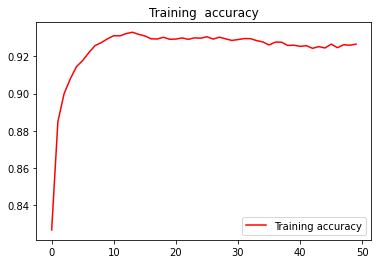

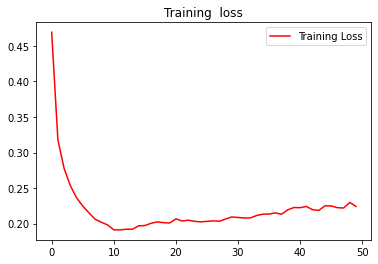

In [88]:
acc = history.history['accuracy']
loss =  history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training  loss')
plt.legend()
plt.show()

In [89]:
model3 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)),
  tf.keras.layers.MaxPooling2D(2, 2),
  #tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
  #tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])
model3.compile(optimizer = 'adam', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model3.fit(x_train, 
                    y_train,
                   epochs = 25)

Train on 60000 samples
Epoch 1/25
60000/60000 [==============================] - 6s 108us/sample - loss: 0.4043 - accuracy: 0.8553
Epoch 2/25
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2730 - accuracy: 0.9013
Epoch 3/25
60000/60000 [==============================] - 6s 103us/sample - loss: 0.2261 - accuracy: 0.9166
Epoch 4/25
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1911 - accuracy: 0.9305
Epoch 5/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1647 - accuracy: 0.9394
Epoch 6/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1403 - accuracy: 0.9490
Epoch 7/25
60000/60000 [==============================] - 6s 103us/sample - loss: 0.1207 - accuracy: 0.9560
Epoch 8/25
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1034 - accuracy: 0.9614
Epoch 9/25
60000/60000 [==============================] - 6s 103us/sample - loss: 0.0875 - accuracy: 0.9684
Epoch

In [90]:
model3.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 69us/sample - loss: 0.5638 - accuracy: 0.9139


[0.5637884166061878, 0.9139]

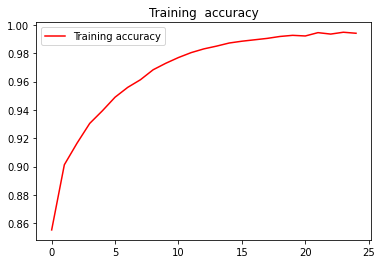

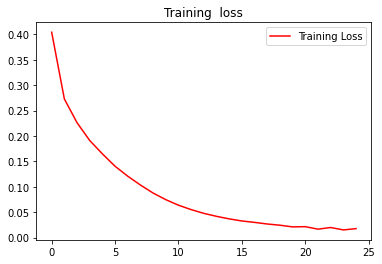

In [91]:
acc = history.history['accuracy']
loss =  history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training  loss')
plt.legend()
plt.show()

In [92]:
from keras.layers import Conv2D, Input, LeakyReLU, Dense, Activation, Flatten, Dropout, MaxPool2D
from keras import models
model = models.Sequential()
model.add(Conv2D(32,3, padding  ="same",input_shape=(28,28,1)))
model.add(LeakyReLU())
model.add(Conv2D(32,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

# Block 2
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(Conv2D(64,3, padding  ="same"))
model.add(LeakyReLU())
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(32,activation='relu'))
model.add(Dense(10,activation="sigmoid"))


model.compile(optimizer = 'rmsprop', 
              loss = 'sparse_categorical_crossentropy', 
              metrics=['accuracy'])
history = model.fit(x_train, 
                    y_train, batch_size=256,
                   epochs = 25)

Epoch 1/25
60000/60000 [==============================] - 10s 161us/step - loss: 0.7418 - accuracy: 0.7014
Epoch 2/25
60000/60000 [==============================] - 9s 154us/step - loss: 0.3553 - accuracy: 0.8717
Epoch 3/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.2864 - accuracy: 0.8947
Epoch 4/25
60000/60000 [==============================] - 9s 154us/step - loss: 0.2473 - accuracy: 0.9081
Epoch 5/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.2206 - accuracy: 0.9177
Epoch 6/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.1977 - accuracy: 0.9265
Epoch 7/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.1800 - accuracy: 0.9330
Epoch 8/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.1648 - accuracy: 0.9377
Epoch 9/25
60000/60000 [==============================] - 9s 155us/step - loss: 0.1500 - accuracy: 0.9429
Epoch 10/25
60000/60000 [====================

In [93]:
model.evaluate(x_test, y_test, verbose=1)

10000/10000 [==============================] - 1s 106us/step


[0.3258482315454632, 0.9308000206947327]

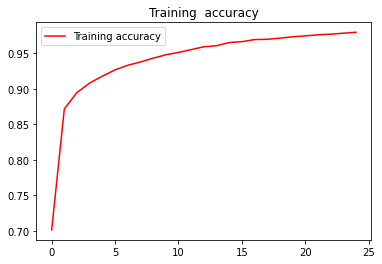

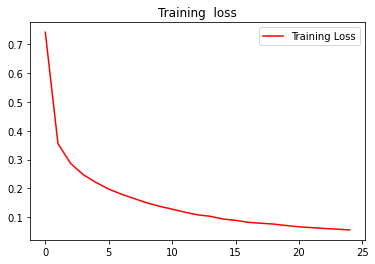

In [94]:
acc = history.history['accuracy']
loss =  history.history['loss']

epochs = range(len(acc))
plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.title('Training  accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.title('Training  loss')
plt.legend()
plt.show()